<a href="https://colab.research.google.com/github/crunchybeepbot/SnekViz/blob/main/AMR_SI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

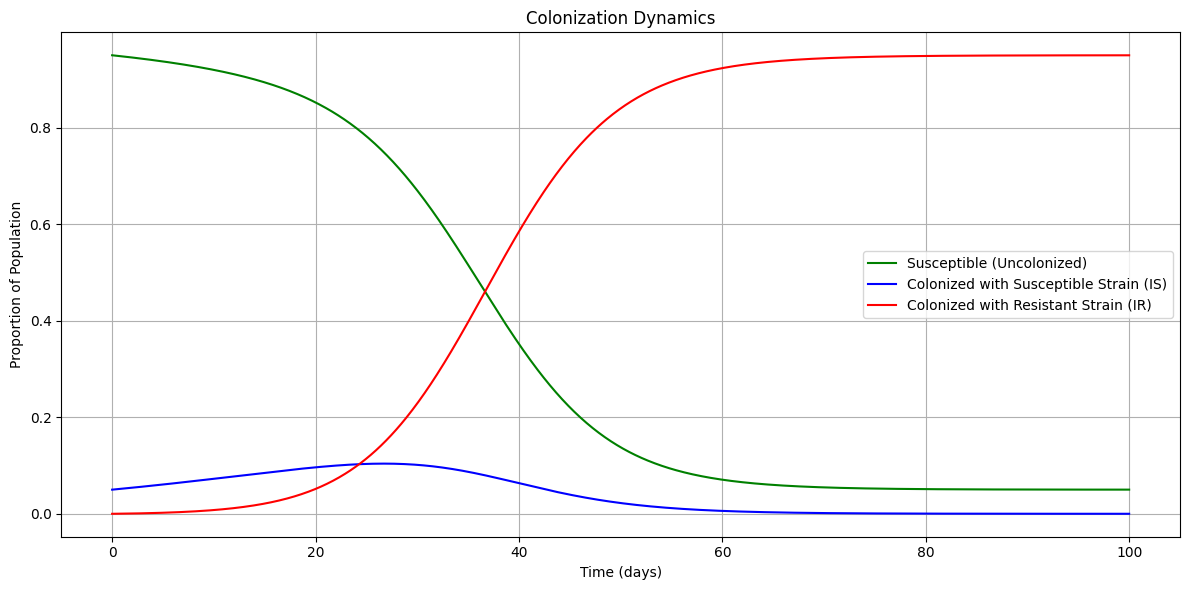

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Time settings
days = 100
time = np.linspace(0, days, 1000)
dt = time[1] - time[0]

# Initial conditions
S0 = 0.95   # Susceptible/uncolonized
IS0 = 0.05  # Colonized with susceptible strain
IR0 = 0.00  # Colonized with resistant strain

# Parameters
beta_S = 0.2        # Transmission rate of susceptible strain (effective reproduction #)
c = 0.0            # Fitness cost of resistance (1.35 gyrA+), c=-.35
beta_R = beta_S * (1 - c)  #Double neg --> positive
#beta_R = beta_S * (1 + c)  # If c = +0.35 and resistance is advantageous


tau = 0.1            # Treatment rate
epsilon = 0.1        # Treated IS that convert to IR

RRS = beta_S         # Colonization rate by susceptible strain
RRC = beta_R         # Colonization rate by resistant strain

mu_S = 0.05          # Clearance rate of susceptible colonization
mu_R = 0.01          # Clearance rate of resistant colonization #infer that resistant cannot replicate DNA as quickly

PRX = 0.0           # Treatment clears resistant colonization --> resistant,,, treatment doesnt work
PSX = 0.95            # Treatment clears susceptible colonization
PSR = 0.05            # Treated IS that convert to IR

# Initialize compartments
S = [S0]
IS = [IS0]
IR = [IR0]

# Simulation loop
for _ in time[1:]:
    s, is_, ir = S[-1], IS[-1], IR[-1]

    # Derivatives
    dS = -RRS * s * is_ - RRC * s * ir + mu_S * is_ + mu_R * ir + tau * (PSX * is_ + PRX * ir)
    dIS = RRS * s * is_ - mu_S * is_ - tau * (PSX * is_ + PSR * is_)
    dIR = RRC * s * ir - mu_R * ir + tau * PSR * is_ - tau * PRX * ir

    # Euler updates
    s_new = s + dS * dt
    is_new = is_ + dIS * dt
    ir_new = ir + dIR * dt

    # Prevent negative values
    s_new = max(s_new, 0)
    is_new = max(is_new, 0)
    ir_new = max(ir_new, 0)

    # Normalize to maintain total population = 1
    total = s_new + is_new + ir_new
    S.append(s_new / total)
    IS.append(is_new / total)
    IR.append(ir_new / total)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(time, S, label="Susceptible (Uncolonized)", color="green")
plt.plot(time, IS, label="Colonized with Susceptible Strain (IS)", color="blue")
plt.plot(time, IR, label="Colonized with Resistant Strain (IR)", color="red")
plt.title("Colonization Dynamics")
plt.xlabel("Time (days)")
plt.ylabel("Proportion of Population")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Messing with parameters does not change overall outcome, 2 points one where the IS/IR cross and one where S/IR cross seem to be at same y


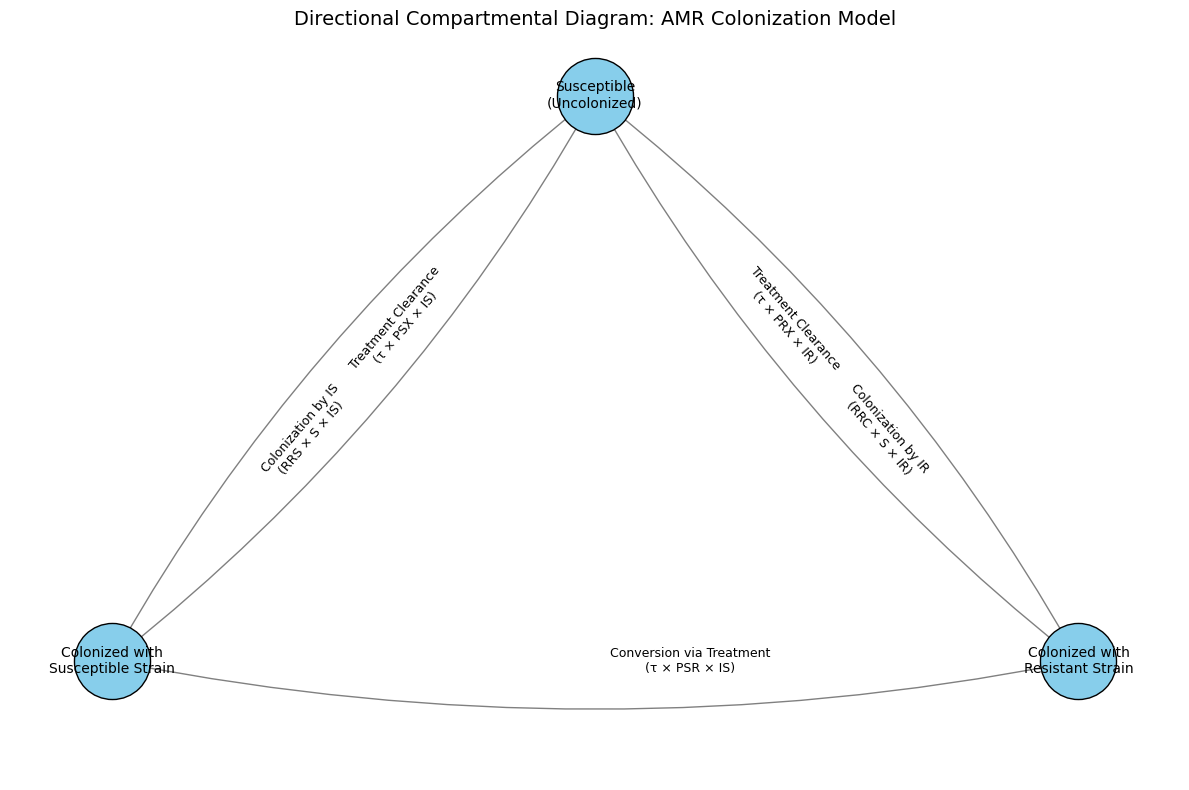

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Define nodes (compartments)
compartments = {
    "S": "Susceptible\n(Uncolonized)",
    "IS": "Colonized with\nSusceptible Strain",
    "IR": "Colonized with\nResistant Strain"
}

# Add nodes
for key, label in compartments.items():
    G.add_node(key, label=label)

# Define edges with labels
edges = [
    ("S", "IS", "Colonization by IS\n(RRS × S × IS)"),
    ("S", "IR", "Colonization by IR\n(RRC × S × IR)"),
    ("IS", "S", "Clearance\n(μS × IS)"),
    ("IR", "S", "Clearance\n(μR × IR)"),
    ("IS", "IR", "Conversion via Treatment\n(τ × PSR × IS)"),
    ("IS", "S", "Treatment Clearance\n(τ × PSX × IS)"),
    ("IR", "S", "Treatment Clearance\n(τ × PRX × IR)")
]

# Add edges to graph
for src, dst, label in edges:
    G.add_edge(src, dst, label=label)

# Layout for nodes
pos = {
    "S": (0, 0),
    "IS": (-2, -2),
    "IR": (2, -2)
}

# Draw the graph
plt.figure(figsize=(12, 8))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='skyblue', edgecolors='black')

# Draw node labels
node_labels = {node: data['label'] for node, data in G.nodes(data=True)}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10)

# Draw directed edges with arrows
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray', arrows=True, arrowsize=25, connectionstyle='arc3,rad=0.1')

# Draw edge labels
edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, label_pos=0.6)

plt.title("Directional Compartmental Diagram: AMR Colonization Model", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()
